In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/final/wrangled/normalized.csv')

Rationale for this section:
 - Some relationships are expected to be linear: instability vs. life expectancy for example. A good first step is to run a linear regression, to see how well the Y value is linearly explained by X. It also tells us which, if any, variables do not correspond to the assumption of linearity.
 - Some relationships are expected (hypothesized) to be non-linear: for example, immigration percentage or HSUS too low or high might both have negative effects of productivity and social stability. A random forest can see if a non-linear model fits the dataset better.
 - Neural network models are also non-linear, but they are more difficult to interpret. They are extremely versatile but usually requires larger datasets, so not sure if the 100 entry dataset can fit a neural network well. Regardless we'll see.

# Linear Regression

Mean Squared Error: 0.35357182341462845


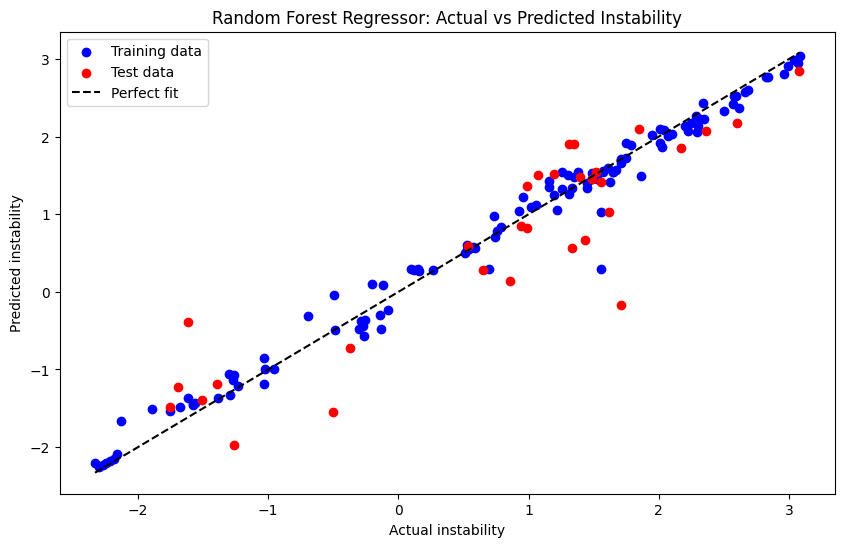

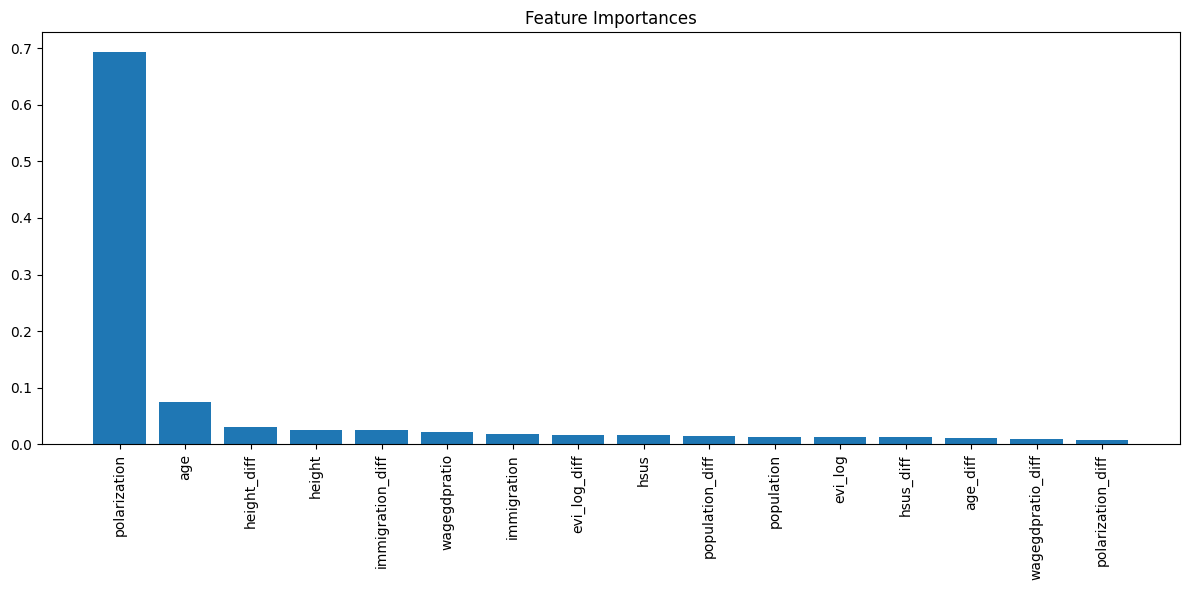

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = df.drop(columns=['year', 'instability'])
y = df['instability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Track fitting and visualize training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, rf.predict(X_train), color='blue', label='Training data')
plt.scatter(y_test, y_pred, color='red', label='Test data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--', label='Perfect fit')
plt.xlabel('Actual instability')
plt.ylabel('Predicted instability')
plt.title('Random Forest Regressor: Actual vs Predicted Instability')
plt.legend()
plt.show()

# Visualize model efficiency
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()